# Perusahaan jual-beli mobil bekas Rusty Bargain

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [1.1 Load data dan mendapatkan gambaran umum](#datarev_1)
    * [1.2 Memeriksa tipe data](#datarev_2)
    * [1.3 Memeriksa nilai yang hilang](#datarev_3)
    * [1.4 Memeriksa nilai yang terduplikasi](#datarev_4)
    * [1.5 Memeriksa gambaran seluruh kolom](#datarev_5)
    * [1.6 Memeriksa rincian data pada tiap kolom](#datarev_6)
    * [1.7 Kesimpulan](#datarev_conclusion)

* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Menghapus kolom yang tidak diperlukan](#dataprep_1)
    * [2.2 Menangani missing value dan nilai yang tidak proper](#dataprep_2)
    * [2.3 Menangani duplicated value](#dataprep_3)
    * [2.4 Mempersiapkan data untuk train model](#dataprep_4)
    * [2.5 Kesimpulan](#dataprep_conclusion)    
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Train Model](#analysis_1)
    * [3.1.1 Model Linear Regression](#analysis_1_1)
    * [3.1.2 Model Decision Tree Regressor](#analysis_1_2)
    * [3.1.3 Model Random Forest Regressor](#analysis_1_3)
    * [3.1.4 Model LGBM Regressor](#analysis_1_4)
    * [3.1.5 Model Cat Boost Regressor](#analysis_1_5)
    * [3.1.6 XGB Regressor](#analysis_1_6)
    * [3.2 Kesimpulan](#analysis_conclusion)

* [Tahap 4. Pengujian](#test)
    * [4.1 Kesimpulan](#test_conclusion)

* [Temuan](#end)

[Kembali ke Daftar Isi](#back)

# Pendahuluan <a id='intro'></a>

Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Dalam aplikasi tersebut, peneliti bisa dengan cepat mengetahui nilai pasar mobil. Peneliti memiliki akses ke data historis, spesifikasi teknis kendaraan, versi model kendaraan, dan harga kendaraan. Rusty Bargain tertarik pada:
- kualitas prediksi
- kecepatan prediksi
- waktu yang diperlukan untuk melatih model


### Tujuan: 
Pada kasus ini, tugas peneliti adalah membuat suatu model yang mampu menentukan nilai pasar mobil.


### Tahapan:
Peneliti memiliki data terkait para klien yang disimpan dalam *file*:
- /datasets/car_data.csv

**Fitur**
- DateCrawled — tanggal ketika profil diunduh dari database
- VehicleType — jenis bodi kendaraan
- RegistrationYear — tahun registrasi kendaraan
- Gearbox — jenis transmisi
- Power — daya (hp)
- Model — model kendaraan
- Mileage — jarak tempuh (diukur dalam satuan km berdasarkan dataset regional tertentu)
- RegistrationMonth — bulan registrasi kendaraan
- FuelType — jenis bahan bakar
- Brand — merek kendaraan
- NotRepaired — apakah kendaraan pernah direparasi sebelumnya
- DateCreated — tanggal pembuatan profil
- NumberOfPictures — jumlah gambar kendaraan
- PostalCode — kode pos pemilik profil (pengguna)
- LastSeen — tanggal aktivitas terakhir pengguna

**Target**
- Price — harga (dalam satuan Euro)


Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis.

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data 
 3. Analisis
 4. Pengujian

[Kembali ke Daftar Isi](#back)


# Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import libraries dan modules yang diperlukan. Untuk libraries catboost, lightgbm, dan xgboost, perlu diinstall terlebih dahulu.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
from scipy import stats as st
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from catboost import CatBoostClassifier,CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

## Load data dan mendapatkan gambaran umum <a name='datarev_1'></a>

**Step 1.2**
Melakukan load data yang diperlukan dari file *car_data.csv* dan menyimpan ke
dalam dataframe df

In [2]:
try:
    df = pd.read_csv('car_data.csv')
except:
    df = pd.read_csv('/datasets/car_data.csv')
#membaca file csv dan konversi ke dataframe df

df.shape
#melihat ukuran dataframe df

(354369, 16)

In [3]:
df.head() 
#melihat 5 baris awal dari dataframe df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
df.info() #general info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

## Memeriksa tipe data <a name='datarev_2'></a>

**Step 1.3**
Melihat tipe data seluruh kolom dalam dataframe df untuk memeriksa kesuaian tipe data dengan isi data

In [5]:
df.dtypes

DateCrawled          object
Price                 int64
VehicleType          object
RegistrationYear      int64
Gearbox              object
Power                 int64
Model                object
Mileage               int64
RegistrationMonth     int64
FuelType             object
Brand                object
NotRepaired          object
DateCreated          object
NumberOfPictures      int64
PostalCode            int64
LastSeen             object
dtype: object

Terlihat bahwa tipe data DateCrawled, Data Created, dan Last Seen yang merupakan data tanggal perlu diubah ke tipe data datetime. 

## Memeriksa nilai yang hilang <a name='datarev_3'></a>

**Step 1.4**
Melakukan pemeriksaan missing value pada dataframe df

In [6]:
missing_values = df.isna().sum()
missing_values

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [7]:
missing_percent = df.isna().sum()/len(df) * 100
missing_percent

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Mileage               0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

In [8]:
missing_table = pd.concat([missing_values, missing_percent], axis=1)
missing_table = missing_table.rename(columns={0: 'Nilai yang Hilang', 1:'Persentase(%)'})
missing_table = missing_table[missing_table.iloc[:,1]!=0].sort_values('Persentase(%)', ascending=False).round(2)
missing_table

,Nilai yang Hilang,Persentase(%)
NotRepaired,71154,20.08
VehicleType,37490,10.58
FuelType,32895,9.28
Gearbox,19833,5.60
Model,19705,5.56


Terdapat 5 kolom yang memilliki nilai yang hilang dengan persentase tertinggi ada pada kolom NotRepaired.

## Memeriksa nilai yang terduplikasi <a name='datarev_4'></a>

**Step 1.5**
Melakukan pemeriksaan duplicated value pada dataframe df

In [9]:
df.duplicated().sum()

262

Terdapat 262 baris yang berisi nilai duplikat.

## Memeriksa gambaran seluruh kolom <a name='datarev_5'></a>

**Step 1.6**
Memeriksa gambaran umum dari kolom pada dataframe df untuk mendeteksi secara cepat anomali yang terjadi

In [10]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Terdapat keanehan pada kolom Price (min bernilai 0), Power (min bernilai 0), Registration Month (min bernilai 0), dan NumberOfPictures (min dan max bernilai 0).

C:\Users\Luqmanulhakim\AppData\Local\Temp\ipykernel_34660\3866693937.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


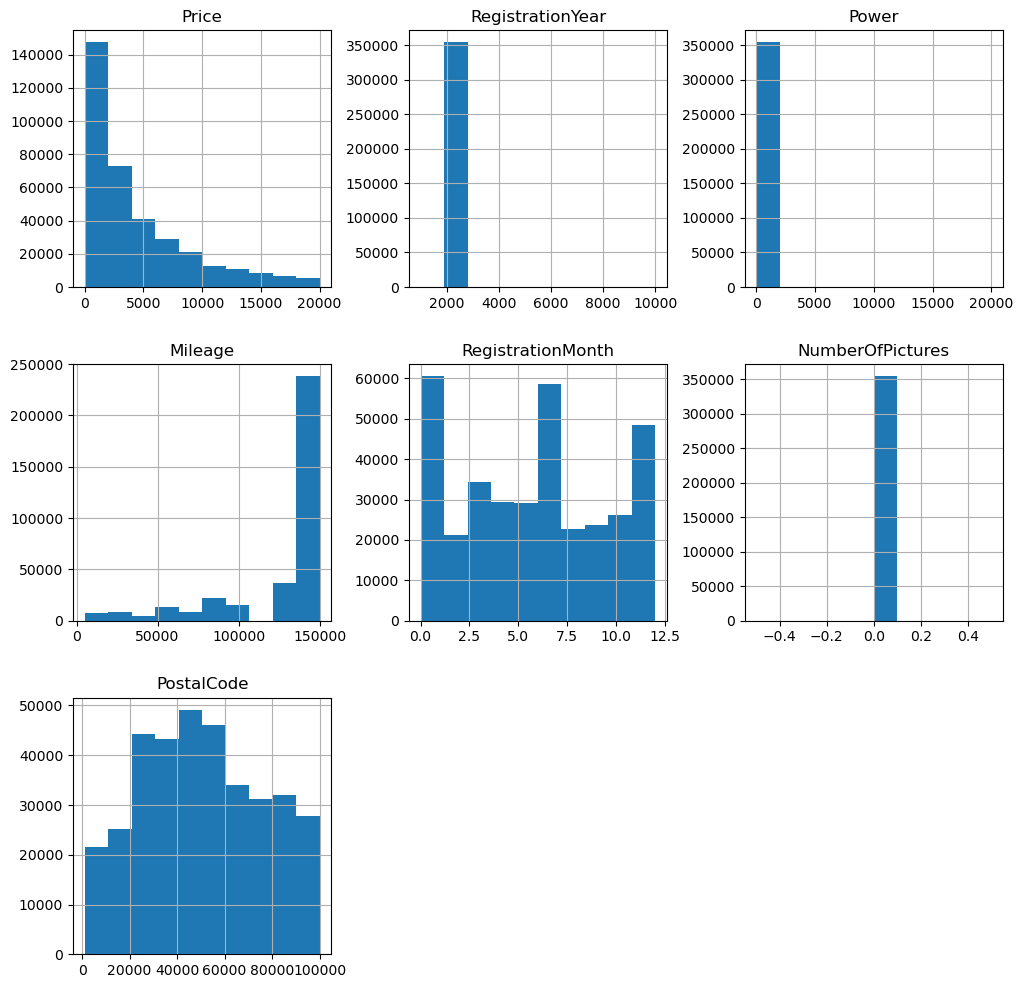

In [11]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

Dari gambaran umum terhadap seluruh kolom di atas dapat terlihat bahwa kolom NumberOfPictures yang sepertinya hanya memiliki satu nilai, kolom Power terdapat banyak nilai nol, dan kolom RegistrationMonth terdapat angka nol.

## Memeriksa rincian data pada tiap kolom <a name='datarev_6'></a>

**Step 1.7**
Memeriksa rincian data tiap kolom dalam dataframe df

In [12]:
df['NumberOfPictures'].value_counts()

NumberOfPictures
0    354369
Name: count, dtype: int64

Dalam kolom ini hanya terdapat nilai 0.

In [13]:
df['NotRepaired'].value_counts()

NotRepaired
no     247161
yes     36054
Name: count, dtype: int64

Nilai yes dan no dalam kolom ini dapat diganti dengan angka 1 dan 0. Nilai yang hilang dapat diganti dengan 0 karena kemungkinan besar pengguna yang mengisi formulir "Apakah mobilnya diperbaiki" tidak akan mengisinya jika mobilnya memang tidak diperbaiki sehingga nilai yang hilang dapat dianggap 0.

In [14]:
df['Power'].value_counts()

Power
0       40225
75      24023
60      15897
150     14590
101     13298
        ...  
610         1
6006        1
5815        1
6018        1
1241        1
Name: count, Length: 712, dtype: int64

In [15]:
df['Power'].value_counts()/len(df)*100

Power
0       11.351162
75       6.779092
60       4.486002
150      4.117177
101      3.752586
          ...    
610      0.000282
6006     0.000282
5815     0.000282
6018     0.000282
1241     0.000282
Name: count, Length: 712, dtype: float64

Dalam kolom ini terdapat nilai 0 dengan persentase 11% dari data, di mana seharusnya untuk kolom ini tidak boleh ada nilai 0. Kita dapat mengisinya dengan nilai rata-rata atau bisa juga dengan forward fill.

In [16]:
tahun = df['RegistrationYear'].unique()
tahun.sort()
print(tahun)

[1000 1001 1039 1111 1200 1234 1253 1255 1300 1400 1500 1600 1602 1688
 1800 1910 1915 1919 1920 1923 1925 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2066 2200 2222 2290 2500 2800 2900 3000 3200 3500 3700 3800 4000
 4100 4500 4800 5000 5300 5555 5600 5900 5911 6000 6500 7000 7100 7500
 7800 8000 8200 8455 8500 8888 9000 9229 9450 9996 9999]


Terdapat nilai registration year tidak relevan, sebagian besarnya dapat dikelompokkan di luar range 1920-2020, baik 1000-1919 dan 2066-9999.

In [17]:
df['PostalCode'].value_counts()

PostalCode
10115    819
65428    613
66333    343
32257    317
44145    317
        ... 
91801      1
31097      1
82444      1
94359      1
31096      1
Name: count, Length: 8143, dtype: int64

Untuk keperluan analisis lebih lanjut, kemungkinan kolom PostalCode tidak diperlukan sehingga ke depannya kolom ini dapat dihapus.

## Kesimpulan <a name="datarev_conclusion"></a>

- Berdasarkan sumber data dalam file car_data.csv terdapat 16 kolom dan 354369 baris.
- Terdapat nilai yang hilang dari 5 kolom yaitu:
     - NotRepaired: 71154 baris yaitu 20,08% dari seluruh data
     - VehicleType : 37490 baris yaitu 10,58% dari seluruh data
     - FuelType: 32895 baris yaitu 9,28% dari seluruh data
     - Gearbox : 19833 baris yaitu 5,59% dari seluruh data
     - Model: 19705 baris yaitu 5,56% dari seluruh data
- Tipe data tanggal pada kolom DateCrawled, DateCreated, dan LastSeen perlu diubah menjadi tipe data datetime. Namun demikian kolom datetime sepertinya tidak diperlukan untuk pelatihan model. Untuk selanjutnya akan dilakukan pendalaman pada tahap Pra-pemrosesan Data.
- Terdapat 262 baris duplikat.
- Nilai dalam kolom NumberOfPictures semuanya nol, jadi kolom tersebut tidak diperlukan dan dapat dihapus.
- Kolom Kode Pos juga kemungkinan besar tidak diperlukan dan dapat dihapus.
- Nilai pada Kolom NotRepaired dapat diganti 1 untuk yes dan 0 untuk no dan nilai yang hilang dapat diganti dengan 0 karena kemungkinan besar pengguna yang mengisi formulir "Apakah mobilnya diperbaiki" tidak akan mengisinya jika mobilnya memang tidak diperbaiki, sehingga nilai yang hilang dapat diasumsikan nol.
- Pada kolom Power terdapat banyak nilai nol yakni sebanyak 11% dari seluruh data. Power seharusnya tidak boleh bernilai 0 sehingga kita bisa mengisinya dengan nilai rata-rata ataupun dengan metode forward fill.
- Terdapat nilai tahun registrasi mobil yang aneh dan ekstrim. Range yang relevan yakni berada dala kisaran 1920-2020. Dalam kolom RegistrationYear terdapat angka tahun 1000-1919 dan 2066-9999.

[Kembali ke Daftar Isi](#back)

# Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

**Step 2.1**
Mengubah tipe data kolom yang berisi data tanggal

In [18]:
df['DateCrawled']= pd.to_datetime(df['DateCrawled'], format='%d/%m/%Y %H:%M')
df['DateCreated']= pd.to_datetime(df['DateCreated'], format='%d/%m/%Y %H:%M')
df['LastSeen']= pd.to_datetime(df['LastSeen'], format='%d/%m/%Y %H:%M')

**Step 2.2** Memeriksa apakah data tanggal relevan untuk analisis lebih lanjut.

In [19]:
print('--------------- DateCrawled ---------------')
df['year_crawled'] = pd.DatetimeIndex(df['DateCrawled']).year
df['year_crawled'] = df['year_crawled'].astype('Int32')
print(df['year_crawled'].describe())

print('--------------- DateCreated ---------------')
df['year_created'] = pd.DatetimeIndex(df['DateCreated']).year
df['year_created'] = df['year_created'].astype('Int32')
print(df['year_created'].describe())

print('--------------- LastSeen ---------------')
df['year_lastSeen'] = pd.DatetimeIndex(df['LastSeen']).year
df['year_lastSeen'] = df['year_lastSeen'].astype('Int32')
print(df['year_lastSeen'].describe())

--------------- DateCrawled ---------------
count    354369.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: year_crawled, dtype: Float64
--------------- DateCreated ---------------
count       354369.0
mean     2015.999924
std         0.009046
min           2014.0
25%           2016.0
50%           2016.0
75%           2016.0
max           2016.0
Name: year_created, dtype: Float64
--------------- LastSeen ---------------
count    354369.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: year_lastSeen, dtype: Float64


In [20]:
df = df.drop(columns=['year_crawled', 'year_created', 'year_lastSeen'])

Dapat kita simpulkan bahwa data tanggal tidak relevan karena memiliki tahun yang sama baik pada saat dimasukkan (DateCreated) maupun pada saat terakhir dilihat (LastSeen). DataCrawled juga tidak relevan untuk analisis lebih lanjut. 

## Menghapus kolom yang tidak diperlukan <a name="dataprep_1"></a>

**Step 2.3** Menghapus kolom yang tidak diperlukan untuk analisis lebih lanjut.

Selain kolom data tanggal, juga kolom PostalCode, serta NumberOfPictures yang hanya berisi nilai nol.

In [21]:
df=df.drop(['DateCrawled','DateCreated','LastSeen','PostalCode','NumberOfPictures'], axis=1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


## Menangani missing value dan nilai yang tidak proper <a name="dataprep_2"></a>

**Step 2.3** Menindaklanjuti missing value pada kolom NotRepaired.

Mengganti nilai yes dengan 1, dan nilai no dengan 0

In [22]:
df['NotRepaired'] = df['NotRepaired'].map({'yes':1, 'no':0})

Mengisi nilai NotRepaired yang hilang dengan 0 karena kemungkinan besar pengguna yang mengisi formulir "Apakah mobilnya diperbaiki" tidak mengisinya jika mobilnya memang tidak diperbaiki sehingga nilainya dapat diasumsikan nol.

In [23]:
df['NotRepaired'] = df['NotRepaired'].fillna(0)

**Step 2.4** Menindaklanjuti nilai yang tidak proper pada kolom Power.

In [24]:
df['Power'].mean()

110.0943366942368

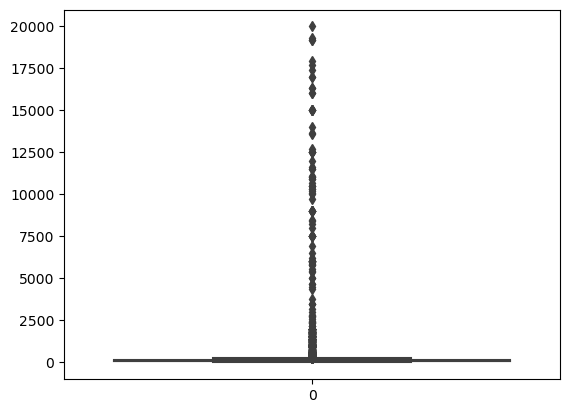

In [25]:
sns.boxplot(data=df['Power']);

Terdapat beberapa data kolom Power dengan nilai yang terlalu ekstrim. Kita akan membatas Power mobil berkekuatan 2000 hp.

In [26]:
df = df[df['Power']<=2000]

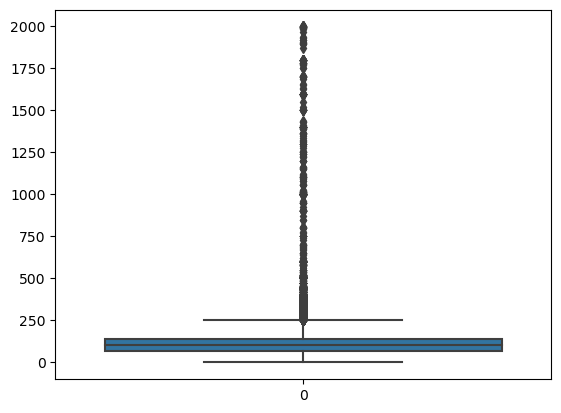

In [27]:
sns.boxplot(data=df['Power']);

RegistrationYear berada dalam kisaran 1920-2020. Kebanyakan adalah 2000, kita akan mengidentifikasi mobil yang memiliki RegistrationYear di bawah 1920 untuk diubah menjadi 1920 dan yang memiliki RegistrationYear di atas 2020 diubah menjadi 2000.

In [28]:
def year_corrected(row):
    year = row['RegistrationYear']
    if year <= 1920 :
        return 1920
    elif year > 2020:
        return 2000
    return year

df['RegistrationYear'] = df.apply(year_corrected, axis=1)

In [29]:
tahun = df['RegistrationYear'].unique()
tahun.sort()
print(tahun)

[1920 1923 1925 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937
 1938 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952
 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


**Step 2.5** Mengisi nilai yang hilang pada kolom Model.

Mengisi nilai yang hilang pada kolom Model dengan asumsi terdapat hubungan antara Model dengan Brand dan RegistrationYear.   

In [30]:
df['Model'].isna().sum()

19690

In [31]:
df['Model'] = df.groupby(['Brand','RegistrationYear'])['Model'].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [32]:
df['Model'].isna().sum()

0

In [33]:
model = df['Model'].unique().astype(dtype='str')
model.sort()
print(model)

['100' '145' '147' '156' '159' '1_reihe' '1er' '200' '2_reihe' '300c'
 '3_reihe' '3er' '4_reihe' '500' '5_reihe' '5er' '601' '6_reihe' '6er'
 '7er' '80' '850' '90' '900' '9000' '911' 'Empty' 'a1' 'a2' 'a3' 'a4' 'a5'
 'a6' 'a8' 'a_klasse' 'accord' 'agila' 'alhambra' 'almera' 'altea'
 'amarok' 'antara' 'arosa' 'astra' 'auris' 'avensis' 'aveo' 'aygo'
 'b_klasse' 'b_max' 'beetle' 'berlingo' 'bora' 'boxster' 'bravo' 'c1' 'c2'
 'c3' 'c4' 'c5' 'c_klasse' 'c_max' 'c_reihe' 'caddy' 'calibra' 'captiva'
 'carisma' 'carnival' 'cayenne' 'cc' 'ceed' 'charade' 'cherokee' 'citigo'
 'civic' 'cl' 'clio' 'clk' 'clubman' 'colt' 'combo' 'cooper' 'cordoba'
 'corolla' 'corsa' 'cr_reihe' 'croma' 'crossfire' 'cuore' 'cx_reihe'
 'defender' 'delta' 'discovery' 'doblo' 'ducato' 'duster' 'e_klasse'
 'elefantino' 'eos' 'escort' 'espace' 'exeo' 'fabia' 'fiesta' 'focus'
 'forester' 'forfour' 'fortwo' 'fox' 'freelander' 'fusion' 'g_klasse'
 'galant' 'galaxy' 'getz' 'gl' 'glk' 'golf' 'grand' 'i3' 'i_reihe' 'ibiza'
 'im

**Step 2.6** Mengisi nilai yang hilang pada kolom VehicleType.

Mengisi nilai yang hilang pada kolom VehicleType dengan asumsi terdapat hubungan antara VehicleType dengan Brand dan Model.   

In [34]:
df['VehicleType'].isna().sum()

37471

In [35]:
df['VehicleType'] = df.groupby(['Brand','Model'])['VehicleType'].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [36]:
df['VehicleType'].isna().sum()

0

In [37]:
vtype = df['VehicleType'].unique().astype(dtype='str')
vtype.sort()
print(vtype)

['Empty' 'bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'suv' 'wagon']


**Step 2.7** Mengisi nilai yang hilang pada kolom FuelType.

Mengisi nilai yang hilang pada kolom FuelType dengan asumsi terdapat hubungan antara FuelType dengan Brand dan Model. 

In [38]:
df['FuelType'].isna().sum()

32867

In [39]:
df['FuelType'] = df.groupby(['Brand','Model'])['FuelType'].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [40]:
df['FuelType'].isna().sum()

0

In [41]:
ftype = df['FuelType'].unique().astype(dtype='str')
ftype.sort()
print(ftype)

['Empty' 'cng' 'electric' 'gasoline' 'hybrid' 'lpg' 'other' 'petrol']


**Step 2.8** Mengisi nilai yang hilang pada kolom Gearbox.

Mengisi nilai yang hilang pada kolom Gearbox dengan asumsi terdapat hubungan antara Gearbox dengan Brand dan RegistrationYear.

In [42]:
df['Gearbox'].isna().sum()

19826

In [43]:
df['Gearbox'] = df.groupby(['Brand','RegistrationYear'])['Gearbox'].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [44]:
df['Gearbox'].isna().sum()

0

In [45]:
gbox = df['Gearbox'].unique().astype(dtype='str')
gbox.sort()
print(gbox)

['Empty' 'auto' 'manual']


**Step 2.9** Mengganti nilai Empty menjadi NaN (na/null).

In [46]:
df = df.replace('Empty',np.nan)

In [47]:
df.isna().sum()

Price                   0
VehicleType             2
RegistrationYear        0
Gearbox               100
Power                   0
Model                3402
Mileage                 0
RegistrationMonth       0
FuelType                2
Brand                   0
NotRepaired             0
dtype: int64

In [48]:
df.isna().sum()/len(df)*100

Price                0.000000
VehicleType          0.000565
RegistrationYear     0.000000
Gearbox              0.028229
Power                0.000000
Model                0.960341
Mileage              0.000000
RegistrationMonth    0.000000
FuelType             0.000565
Brand                0.000000
NotRepaired          0.000000
dtype: float64

Dapat terlihat bahwa masih terdapat nilai yang hilang dengan maks persentase 0,96%, sudah jauh berkurang dari sebelumnya. Hal ini akan kita tindaklanjuti dengan penghapusan baris terkait.

**Step 2.10** Menghapus baris yang terkait dengan missing value.

In [49]:
df = df.dropna()

In [50]:
df.isna().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
dtype: int64

Nilai yang hilang sudah tidak ada.

## Menangani duplicated value <a name="dataprep_3"></a>

**Step 2.11** Menindaklanjuti duplicated value pada dataframe df.

In [51]:
df = df.drop_duplicates()

In [52]:
df.duplicated().sum()

0

Nilai yang terduplikasi juga sudah tidak ada.

## Mempersiapkan data untuk train model <a name="dataprep_4"></a>

**Step 2.12** Melihat kembali informasi secara umum dari dataframe df.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317152 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price              317152 non-null  int64  
 1   VehicleType        317152 non-null  object 
 2   RegistrationYear   317152 non-null  int64  
 3   Gearbox            317152 non-null  object 
 4   Power              317152 non-null  int64  
 5   Model              317152 non-null  object 
 6   Mileage            317152 non-null  int64  
 7   RegistrationMonth  317152 non-null  int64  
 8   FuelType           317152 non-null  object 
 9   Brand              317152 non-null  object 
 10  NotRepaired        317152 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 29.0+ MB


In [54]:
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,0.0
1,18300,coupe,2011,manual,190,a4,125000,5,gasoline,audi,1.0
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,0.0
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,0.0
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,0.0


**Step 2.13** Mempersiapkan dataframe untuk pembuatan model.

Menyalin dataframe untuk persiapan membuat model dengan catboost dan lightgbm tanpa menerjemahkan data kategorikal ke nominal karena kedua model tersebut dapat berjalan dengan data kategorikal.

In [55]:
df_categorical = df.copy()

**Step 2.14** Melakukan konversi feature kategorikal menjadi nominal dengan menggunakan OrdinalEncoder.

In [56]:
ordinal_encoder = OrdinalEncoder()
columns = list(df.select_dtypes(include='object').columns)
df[columns] = ordinal_encoder.fit_transform(df[columns].astype('str'))
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,4.0,1993,1.0,0,116.0,150000,0,6.0,37.0,0.0
1,18300,2.0,2011,1.0,190,29.0,125000,5,2.0,1.0,1.0
2,9800,6.0,2004,0.0,163,117.0,125000,8,2.0,14.0,0.0
3,1500,5.0,2001,1.0,75,116.0,150000,6,6.0,37.0,0.0
4,3600,5.0,2008,1.0,69,101.0,90000,7,2.0,31.0,0.0


**Step 2.15** Menampilkan Heatmap Diagram Korelasi dari data hasil proses OrdinalEncoder.

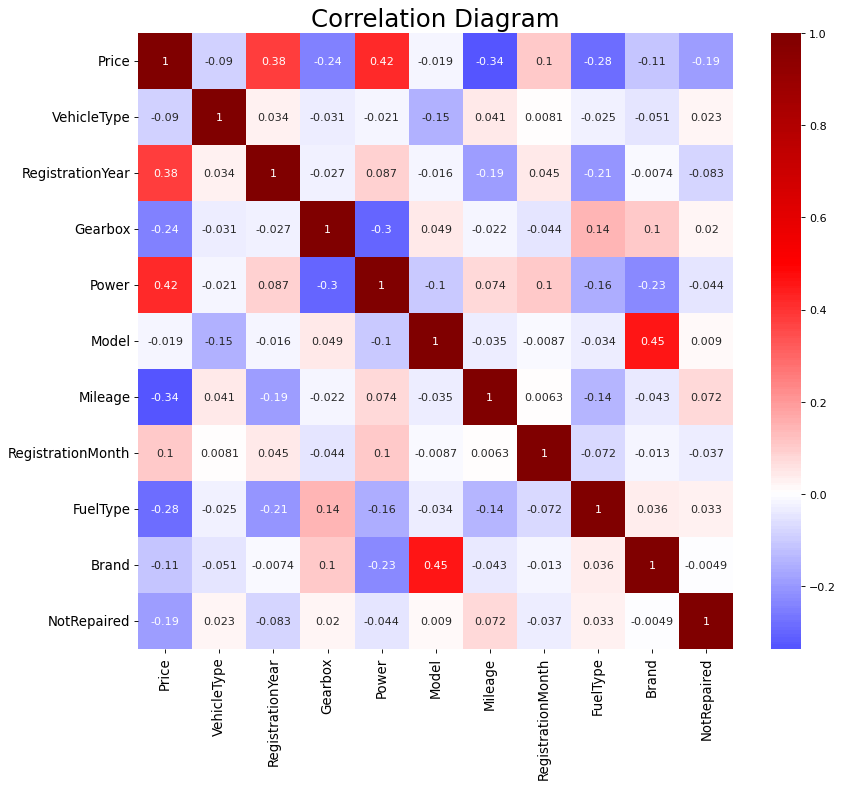

In [57]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='seismic', center=0,
            annot=True)
plt.title('Correlation Diagram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [58]:
df.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Power                0.416139
RegistrationYear     0.383066
RegistrationMonth    0.103548
Model               -0.019424
VehicleType         -0.089617
Brand               -0.106414
NotRepaired         -0.192072
Gearbox             -0.242031
FuelType            -0.284506
Mileage             -0.335701
Name: Price, dtype: float64

- Power dan RegistrationYear memiliki korelasi positif yang kuat dengan Price.
- Mileage dan FuelType memiliki korelasi negatif yang kuat dengan Price.

**Step 2.16** Menampilkan distribusi Price untuk melihat gambaran target.

In [59]:
df['Price'].mean()

4420.583389037433

C:\Users\Luqmanulhakim\AppData\Local\Temp\ipykernel_34660\1615409367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'].values)


2700.0

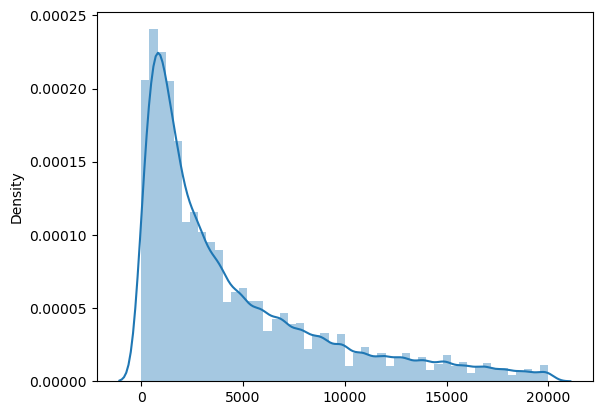

In [60]:
sns.distplot(df['Price'].values)
np.median(df['Price'].values)

## Kesimpulan <a name="dataprep_conclusion"></a>

- Kita telah menghapus kolom yang tidak diperlukan untuk analisis lebih lanjut yaitu DateCrawled, DateCreated, LastSeen, PostalCode, NumberOfPictures
- Kita telah mengisi nilai yang hilang dari NotRepaired dengan 0 karena kemungkinan besar pengguna yang mengisi formulir "Apakah mobilnya diperbaiki" tidak mengisinya jika memang mobilnya tidak diperbaiki sehingga nilai yang hilang dapat diasumsikan nol.
- Kita telah mengeluarkan Power dengan nilai yang ekstrim lebih dari 2000 hp.
- Kita telah menetapkan RegistrationYear antara 1920-2020. Sebagian besar nilainya adalah 2000, oleh karenanya mobil yang tidak teridentifikasi pada tahun 2020 diasumsikan nilainya 2000. Untuk nilai yang kurang dari 1920 nilainya dijadikan 1920. 
- Kita telah mengisi nilai yang hilang pada kolom Model dengan asumsi ada korelasi antara Model dengan Brand dan RegistrationYear.
- Kita telah mengisi nilai yang hilang pada kolom VehicleType dengan asumsi ada korelasi antara VehicleType dengan Brand dan Model.
- Kita telah mengisi nilai yang hilang pada kolom FuelType dengan asumsi terdapat korelasi antara FuelType dengan Brand dan Model. 
- Kita telah mengisi nilai yang hilang pada kolom Gearbox dengan asumsi ada korelasi antara Gearbox dengan Brand dan RegistrationYear.
- Kita telah menghapus sisa nilai yang hilang yang kurang dari 1%.
- Kita telah menghapus duplikat.
- Kita telah mengubah data kategorikal menjadi nominal menggunakan OrdinalEncoder
- Kita menemukan bahwa Power dan RegistrationYear memiliki korelasi positif yang kuat dengan Price.
- Kita menemukan bahwa Mileage dan FuelType memiliki korelasi negatif yang kuat dengan Price.
- Kita menemukan bahwa Price memiliki histogram yang miring ke kanan, dengan demikian mediannya lebih rendah dari nilai rata-rata.

[Kembali ke Daftar Isi](#back)

# Tahap 3. Analisis <a name='analysis'></a>

## Train Model <a name='analysis_1'></a>

**Step 3.1** Melatih model.

In [61]:
X = df.drop(['Price'], axis=1)
y = df['Price']

X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.25, random_state=12345)

X_1 = X_1.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_1 = y_1.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print('Ukuran feature set train:', X_train.shape)
print('Ukuran feature set valid:', X_valid.shape)
print('Ukuran feature set test:', X_test.shape)

Ukuran feature set train: (178398, 10)
Ukuran feature set valid: (59466, 10)
Ukuran feature set test: (79288, 10)


**Step 3.2** Melakukan standarisasi feature menggunakan StandardScaler, fit scaler hanya pada set train dan penerapannya pada seluruh bagian (train, valid, dan test) untuk mengurangi overfitting.

In [62]:
scaler = StandardScaler()
numeric = ['RegistrationYear','Power','Mileage']
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

### Model Linear Regression <a name='analysis_1_1'></a>

**Step 3.3** Menjalankan model Linear Regression.

In [63]:
%%time
lr = LinearRegression()
lr.fit(X_train,y_train)
predicted_valid = lr.predict(X_valid)
rmse = mean_squared_error(y_valid, predicted_valid)**0.5
print("RMSE:", rmse)
print("Mean:", pd.Series(predicted_valid).mean())

RMSE: 3306.3734224786813
Mean: 4420.821218508726
CPU times: total: 62.5 ms
Wall time: 38 ms


### Model Decision Tree Regressor <a name='analysis_1_2'></a>

**Step 3.4** Menjalankan model Decision Tree Regressor.

In [64]:
%%time
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)
predicted_valid = dtr_model.predict(X_valid)
rmse = mean_squared_error(y_valid, predicted_valid)**0.5
print("RMSE:", rmse)
print("Mean:", pd.Series(predicted_valid).mean())

RMSE: 2441.169062029298
Mean: 4439.890390143334
CPU times: total: 2.05 s
Wall time: 1.13 s


### Model Random Forest Regressor <a name='analysis_1_3'></a>

**Step 3.5** Menjalankan model Random Forest Regressor.

In [65]:
%%time
rfr_model = RandomForestRegressor(n_estimators=10, random_state=12345)
rfr_model.fit(X_train,y_train)
predicted_valid = rfr_model.predict(X_valid)
rmse = mean_squared_error(y_valid, predicted_valid)**0.5
print("RMSE:", rmse)
print("Mean:", pd.Series(predicted_valid).mean())

RMSE: 1913.6762716843773
Mean: 4457.503211090307
CPU times: total: 7.83 s
Wall time: 7.96 s


### Model LGBM Regressor <a name='analysis_1_4'></a>

**Step 3.6** Menjalankan model Light Gradient Boost Regressor.

In [66]:
%%time
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train,y_train)
predicted_valid = lgbm_model.predict(X_valid)
rmse = mean_squared_error(y_valid, predicted_valid)**0.5
print("RMSE:", rmse)
print("Mean:", pd.Series(predicted_valid).mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 178398, number of used features: 10
[LightGBM] [Info] Start training from score 4424.118880
RMSE: 1842.07684642355
Mean: 4437.4183203625
CPU times: total: 2.86 s
Wall time: 531 ms


### Model Cat Boost Regressor <a name='analysis_1_5'></a>

**Step 3.7** Menjalankan model Cat Boost Regressor.

In [67]:
%%time
cbr_model = CatBoostRegressor(loss_function="RMSE", iterations=20)
cbr_model.fit(X_train,y_train)
predicted_valid = cbr_model.predict(X_valid)
rmse = mean_squared_error(y_valid, predicted_valid)**0.5
print("RMSE:", rmse)
print("Mean:", pd.Series(predicted_valid).mean())

Learning rate set to 0.5
0:	learn: 3274.1573993	total: 145ms	remaining: 2.75s
1:	learn: 2721.2655356	total: 157ms	remaining: 1.41s
2:	learn: 2477.6610536	total: 168ms	remaining: 954ms
3:	learn: 2345.2557841	total: 178ms	remaining: 713ms
4:	learn: 2277.5886259	total: 190ms	remaining: 569ms
5:	learn: 2219.7752428	total: 200ms	remaining: 466ms
6:	learn: 2189.8796269	total: 212ms	remaining: 394ms
7:	learn: 2150.3114730	total: 226ms	remaining: 338ms
8:	learn: 2118.1418172	total: 238ms	remaining: 290ms
9:	learn: 2096.1842050	total: 248ms	remaining: 248ms
10:	learn: 2076.4694544	total: 258ms	remaining: 211ms
11:	learn: 2055.1164404	total: 270ms	remaining: 180ms
12:	learn: 2038.7020087	total: 284ms	remaining: 153ms
13:	learn: 2027.3666962	total: 293ms	remaining: 126ms
14:	learn: 2021.5415916	total: 305ms	remaining: 102ms
15:	learn: 2010.0499783	total: 318ms	remaining: 79.5ms
16:	learn: 1999.2616889	total: 328ms	remaining: 57.8ms
17:	learn: 1991.7768368	total: 339ms	remaining: 37.7ms
18:	learn:

### XGB Regressor <a name='analysis_1_6'></a>

**Step 3.8** Menjalankan model Extreme Gradient Boost Regressor.

In [68]:
%%time
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)
predicted_valid = xgb_model.predict(X_valid)
rmse = mean_squared_error(y_valid, predicted_valid)**0.5
print("rmse:", rmse)
print("mean:", pd.Series(predicted_valid).mean())

rmse: 1795.3234956693302
mean: 4439.454
CPU times: total: 2.83 s
Wall time: 1.59 s


In [69]:
index=['LR', 'DTR', 'RFR', 'LGBM', 'CB', 'XGB']
summary=pd.DataFrame(data={'RMSE': [3306.37, 2429.26, 1913.68, 1842.08, 1984.45, 1795.32],
                            'Mean': [4420.82, 4443.13, 4457.50, 4437.42, 4437.45, 4439.45],
                            'CPU times (ms)': [62.5, 2050, 7830, 2860, 3230, 2830],
                            'Wall time (ms)': [38, 1130, 7960, 531, 485, 1590]},
                    index=index)
summary

,RMSE,Mean,CPU times (ms),Wall time (ms)
LR,3306.37,4420.82,62.5,38
DTR,2429.26,4443.13,2050.0,1130
RFR,1913.68,4457.50,7830.0,7960
LGBM,1842.08,4437.42,2860.0,531
CB,1984.45,4437.45,3230.0,485
XGB,1795.32,4439.45,2830.0,1590


Berdasarkan CPU times terlihat Linear Regression dan Decision Tree Regressor adalah model tercepat, sedangkan Random Forest Regressor adalah yang paling lambat.

Nilai RMSE terbaik adalah model XGB Regressor dan LGBM Regressor.

**Step 3.9** Melakukan cross-validation.

In [70]:
def cross_val_score_DecisionTreeRegressor (X1, y1, depth):
    scores = []
    sample_size = int(len(X1)/3)
    for i in range(0, 3, 1):
        valid_indexes = X1.iloc[i:i+sample_size].index
        train_indexes = X1[~(X1.index.isin(valid_indexes))].index
        X_train = X1.iloc[train_indexes]
        X_valid = X1.iloc[valid_indexes]
        y_train = y1.iloc[train_indexes]
        y_valid = y1.iloc[valid_indexes]
        
        model = DecisionTreeRegressor(max_depth=depth,random_state=12345)
        model = model.fit(X_train, y_train)
        predicted_valid = model.predict(X_valid)
        rmse = mean_squared_error(y_valid, predicted_valid)**0.5
        scores.append(rmse)
    return scores

In [71]:
%%time
for depth in range(7,15):
    scores = cross_val_score_DecisionTreeRegressor (X_1, y_1,depth)
    final_score = pd.Series(scores).mean()  
    print("Depth =", depth, ": ", end='')
    print('Nilai RMSE rata-rata untuk model DecisionTreeRegressor:', final_score)
    print('----------------------------------------------')

Depth = 7 : Nilai RMSE rata-rata untuk model DecisionTreeRegressor: 2298.892155933716
----------------------------------------------
Depth = 8 : Nilai RMSE rata-rata untuk model DecisionTreeRegressor: 2217.9555243322843
----------------------------------------------
Depth = 9 : Nilai RMSE rata-rata untuk model DecisionTreeRegressor: 2167.6319351958723
----------------------------------------------
Depth = 10 : Nilai RMSE rata-rata untuk model DecisionTreeRegressor: 2127.1086114650734
----------------------------------------------
Depth = 11 : Nilai RMSE rata-rata untuk model DecisionTreeRegressor: 2110.042159473153
----------------------------------------------
Depth = 12 : Nilai RMSE rata-rata untuk model DecisionTreeRegressor: 2112.175067320787
----------------------------------------------
Depth = 13 : Nilai RMSE rata-rata untuk model DecisionTreeRegressor: 2123.040323557084
----------------------------------------------
Depth = 14 : Nilai RMSE rata-rata untuk model DecisionTreeRegr

In [72]:
def cross_val_score_RandomForestRegressor (X1, y1, estimators):
    scores = []
    sample_size = int(len(X1)/3)
    for i in range(0, 3, 1):
        valid_indexes = X1.iloc[i:i+sample_size].index
        train_indexes = X1[~(X1.index.isin(valid_indexes))].index
        X_train = X1.iloc[train_indexes]
        X_valid = X1.iloc[valid_indexes]
        y_train = y1.iloc[train_indexes]
        y_valid = y1.iloc[valid_indexes]
        
        model = RandomForestRegressor(n_estimators=estimators,random_state=12345)
        model = model.fit(X_train, y_train)
        predicted_valid = model.predict(X_valid)
        rmse = mean_squared_error(y_valid, predicted_valid)**0.5
        scores.append(rmse)
    return scores

In [73]:
%%time
for estimators in range(10,81,10):
    scores = cross_val_score_RandomForestRegressor (X_1, y_1, estimators)
    final_score = pd.Series(scores).mean()
    print("Estimators =", estimators, ": ", end='')
    print('Nilai RMSE rata-rata untuk model RandomForestRegressor:', final_score)
    print('----------------------------------------------')

Estimators = 10 : Nilai RMSE rata-rata untuk model RandomForestRegressor: 1938.9066431432818
----------------------------------------------
Estimators = 20 : Nilai RMSE rata-rata untuk model RandomForestRegressor: 1898.925070740181
----------------------------------------------
Estimators = 30 : Nilai RMSE rata-rata untuk model RandomForestRegressor: 1882.9468064467637
----------------------------------------------
Estimators = 40 : Nilai RMSE rata-rata untuk model RandomForestRegressor: 1875.8411734313443
----------------------------------------------
Estimators = 50 : Nilai RMSE rata-rata untuk model RandomForestRegressor: 1872.23608302272
----------------------------------------------
Estimators = 60 : Nilai RMSE rata-rata untuk model RandomForestRegressor: 1867.7836967031897
----------------------------------------------
Estimators = 70 : Nilai RMSE rata-rata untuk model RandomForestRegressor: 1865.3203845512107
----------------------------------------------
Estimators = 80 : Nilai

Proses di atas memakan waktu yang lama di mana memerlukan waktu sekitar 13 menit.

**Step 3.10** Gradient Boosting.

In [74]:
def LGBM_regressor(X1, y1, estimators):
    model = LGBMRegressor(n_estimators=estimators, random_state=12345)
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, predicted_valid)**0.5
    mean = pd.Series(predicted_valid).mean()
    return rmse, mean

In [75]:
%%time
for estimators in range(30,131,10):
    rmse,mean = LGBM_regressor(X_train, y_train,estimators)
    print("Estimators =", estimators, ": ", end='')
    print('Nilai RMSE rata-rata untuk model LGBMRegressor:', rmse)
    print("Mean:", mean)
    print('----------------------------------------------')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 178398, number of used features: 10
[LightGBM] [Info] Start training from score 4424.118880
Estimators = 30 : Nilai RMSE rata-rata untuk model LGBMRegressor: 2041.1506704267638
Mean: 4436.687036703251
----------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 178398, number of used features: 10
[LightGBM] [Info] Start training from score 4424.118880
Estimators = 40 : Nilai RM

In [76]:
def CatBoost_regressor(X1, y1, estimators):
    model = CatBoostRegressor(n_estimators=estimators, random_state=12345)
    model.fit(X_train, y_train, verbose=10)
    predicted_valid = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, predicted_valid)**0.5
    mean = pd.Series(predicted_valid).mean()
    return rmse, mean

In [77]:
%%time
for estimators in range(30,131,10):
    rmse,mean = CatBoost_regressor(X_train, y_train,estimators)
    print("Estimators =", estimators, ": ", end='')
    print('Nilai RMSE rata-rata untuk model CatBoostRegressor:', rmse)
    print("mean:", mean)
    print('----------------------------------------------')

Learning rate set to 0.5
0:	learn: 3285.8681240	total: 19.8ms	remaining: 575ms
10:	learn: 2071.8382306	total: 189ms	remaining: 326ms
20:	learn: 1968.6680085	total: 358ms	remaining: 153ms
29:	learn: 1919.9292559	total: 513ms	remaining: 0us
Estimators = 30 : Nilai RMSE rata-rata untuk model CatBoostRegressor: 1930.7533605111912
mean: 4438.033549663069
----------------------------------------------
Learning rate set to 0.5
0:	learn: 3285.8681240	total: 24.8ms	remaining: 969ms
10:	learn: 2071.8382306	total: 220ms	remaining: 580ms
20:	learn: 1968.6680085	total: 388ms	remaining: 351ms
30:	learn: 1916.7902323	total: 567ms	remaining: 165ms
39:	learn: 1882.1518100	total: 722ms	remaining: 0us
Estimators = 40 : Nilai RMSE rata-rata untuk model CatBoostRegressor: 1898.2691845616414
mean: 4438.292073645338
----------------------------------------------
Learning rate set to 0.5
0:	learn: 3285.8681240	total: 19ms	remaining: 931ms
10:	learn: 2071.8382306	total: 172ms	remaining: 609ms
20:	learn: 1968.6

In [78]:
def XGB_regressor(X1, y1, estimators):
    model = XGBRegressor(n_estimators=estimators, random_state=12345)
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, predicted_valid)**0.5
    mean = pd.Series(predicted_valid).mean()
    return rmse, mean

In [79]:
%%time
for estimators in range(30,131,10):
    rmse,mean = XGB_regressor(X_train, y_train,estimators)
    print("Estimators =", estimators, ": ", end='')
    print('Nilai RMSE rata-rata untuk model XGBRegressor:', rmse)
    print("mean:", mean)
    print('----------------------------------------------')

Estimators = 30 : Nilai RMSE rata-rata untuk model XGBRegressor: 1875.3941355339282
mean: 4440.904
----------------------------------------------
Estimators = 40 : Nilai RMSE rata-rata untuk model XGBRegressor: 1849.3619475716375
mean: 4440.6655
----------------------------------------------
Estimators = 50 : Nilai RMSE rata-rata untuk model XGBRegressor: 1829.550875969385
mean: 4439.3794
----------------------------------------------
Estimators = 60 : Nilai RMSE rata-rata untuk model XGBRegressor: 1820.5324120869514
mean: 4438.905
----------------------------------------------
Estimators = 70 : Nilai RMSE rata-rata untuk model XGBRegressor: 1814.2363106233634
mean: 4439.132
----------------------------------------------
Estimators = 80 : Nilai RMSE rata-rata untuk model XGBRegressor: 1806.6243160547492
mean: 4439.6367
----------------------------------------------
Estimators = 90 : Nilai RMSE rata-rata untuk model XGBRegressor: 1797.6360008315448
mean: 4439.693
-----------------------

**Step 3.11** Membuat kondisi jika data kategorikal tidak diubah ke nominal.

In [80]:
categorical = ['Brand','Model','VehicleType','Gearbox','FuelType']

In [81]:
df_categorical[categorical] = df_categorical[categorical].astype('category')
df_categorical['NotRepaired'] = df_categorical['NotRepaired'].astype('int64')

**Step 3.12**  Mengubah fitur kategorikal ke format kategori.

In [82]:
X_ = df_categorical.drop(['Price'],axis=1)
y_ = df_categorical['Price']

**Step 3.13** Melakukan split data.

In [83]:
X__1, X__test, y__1, y__test = train_test_split(X_, y_, test_size=0.25, random_state=12345)
X__train, X__valid, y__train, y__valid = train_test_split(X__1, y__1, test_size=0.25, random_state=12345)

X__1 = X__1.reset_index(drop=True)
X__test = X__test.reset_index(drop=True)
y__1 = y__1.reset_index(drop=True)
y__test = y__test.reset_index(drop=True)

print('Ukuran feature set train:', X__train.shape)
print('Ukuran feature set valid:', X__valid.shape)
print('Ukuran feature set test:', X__test.shape)

Ukuran feature set train: (178398, 10)
Ukuran feature set valid: (59466, 10)
Ukuran feature set test: (79288, 10)


**Step 3.14** Menskalakan data numerikal.

In [84]:
scaler = StandardScaler()
numeric = ['RegistrationYear','Power','Mileage']
X__train[numeric] = scaler.fit_transform(X__train[numeric])
X__valid[numeric] = scaler.transform(X__valid[numeric])
X__test[numeric] = scaler.transform(X__test[numeric])

**Step 3.15** Menjalankan model.

In [85]:
def cat_LGBM_regressor(X1, y1, estimators, categorical_feature=categorical):
    model = LGBMRegressor(n_estimators=estimators, random_state=12345)
    model.fit(X__train, y__train)
    predicted_valid = model.predict(X__valid)
    rmse = mean_squared_error(y__valid, predicted_valid)**0.5
    mean = pd.Series(predicted_valid).mean()
    return rmse, mean

In [86]:
%%time
for estimators in range(30,131,10):
    rmse,mean = cat_LGBM_regressor(X__train, y__train,estimators, categorical_feature=categorical)
    print("Estimators =", estimators, ": ", end='')
    print('Nilai RMSE rata-rata untuk model LGBMRegressor:', rmse)
    print("Mean:", mean)
    print('----------------------------------------------')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 178398, number of used features: 10
[LightGBM] [Info] Start training from score 4424.118880
Estimators = 30 : Nilai RMSE rata-rata untuk model LGBMRegressor: 1912.1243718846827
Mean: 4434.28829475852
----------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 178398, number of used features: 10
[LightGBM] [Info] Start training from score 4424.118880
Estimators = 40 : Nilai RMS

## Kesimpulan <a name="analysis_conclusion"></a>

- Kita telah melakukan standarisasi feature dengan menggunakan StandardScaler pada set train untuk mengurangi overfitting.
- Regresi Linier merupakan model tercepat namun tidak memberikan hasil RMSE yang baik.
- Random Forest Regressor adalah yang paling lambat jadi kami tidak akan memeriksanya.
- DecisionTreeRegressor dan CatBoostRegressor adalah model yang cepat.
- Nilai RMSE terbaik adalah model LGBMRegressor dan RandomForestRegressor jadi kita akan melakukan setting hyperparameternya.
- Estimator terbaik RandomForestRegressor berjumlah lebih dari 30 estimator tetapi membutuhkan waktu yang lama untuk menjalankannya.
- Kita telah memeriksa apa yang terjadi pada Regresor LGMB jika kita tidak mengubah data kategorikal menjadi nominal, karena model ini dapat mendukung pengerjaan dengan data kategorikal. Kita melakukan konversi fitur kategorikal ke format kategori serta menyiapkan data kategorikal untuk melatih model
- LGBMRegressor dengan data kategorikal dan penyetelan hyperparameter categorical_feature memiliki hasil terbaik dengan RMSE-nya 1822, dan jauh lebih cepat (sekitar 4 detik) dibandingkan RandomForestRegressor (sekitar 13 menit).
- Kita akan memeriksa LGBMRegressor dengan estimator 130, RandomForestRegressor dengan 80 estimator dan DecisionTreeRegressor hyperparameter max_depth 11.

[Kembali ke Daftar Isi](#back)

# Tahap 4. Pengujian <a name="test"></a>

**Step 4.1** Menjalankan model Decision Tree Regressor, Random Forest Regressor, dan LGBM Regressor sebagai tahap awal.

In [90]:
%%time
dtr_model = DecisionTreeRegressor(max_depth=11,random_state=12345)
dtr_model.fit(X_train,y_train)
predicted_test = dtr_model.predict(X_test)
rmse = mean_squared_error(y_test, predicted_test)**0.5
print("Nilai RMSE untuk model Decision Tree Regressor:", rmse)
print("Nilai Mean untuk model Decision Tree Regressor:", pd.Series(predicted_test).mean())

Nilai RMSE untuk model Decision Tree Regressor: 2106.389348588228
Nilai Mean untuk model Decision Tree Regressor: 4428.188441386057
CPU times: total: 578 ms
Wall time: 581 ms


In [91]:
%%time
rfr_model = RandomForestRegressor(n_estimators=80 ,random_state=12345)
rfr_model.fit(X_train,y_train)
predicted_test = rfr_model.predict(X_test)
rmse = mean_squared_error(y_test, predicted_test)**0.5
print("Nilai RMSE untuk model Random Forest Regressor:", rmse)
print("Nilai Mean untuk model Random Forest Regressor:", pd.Series(predicted_test).mean())

Nilai RMSE untuk model Random Forest Regressor: 1858.232139374764
Nilai Mean untuk model Random Forest Regressor: 4448.217610886819
CPU times: total: 1min 1s
Wall time: 1min 2s


In [92]:
%%time
lgbm_model = LGBMRegressor(n_estimators=130, random_state=12345)
lgbm_model.fit(X_train,y_train)
predicted_test = lgbm_model.predict(X_test)
rmse = mean_squared_error(y_test, predicted_test)**0.5
print("Nilai RMSE untuk model LGBM Regressor:", rmse)
print("Nilai Mean untuk model LGBM Regressor:", pd.Series(predicted_test).mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 178398, number of used features: 10
[LightGBM] [Info] Start training from score 4424.118880
Nilai RMSE untuk model LGBM Regressor: 1830.776504489804
Nilai Mean untuk model LGBM Regressor: 4417.121237336348
CPU times: total: 4.38 s
Wall time: 616 ms


Model Random Forest Regressor memiliki RMSE terbaik tahun 1858 (setelah cross-validation), namun sangat lambat saat menghitung model. Sebaliknya, model LGBM Regressor cepat dalam menghitung dan menyesuaikan (fit) model serta memberikan hasil yang baik, dengan nilai RMSE 1831 lebih baik dibandingkan Random Forest Regressor dan lebih cepat.

**Step 4.2** Menyempurnakan model LGBM Regressor dengan mengubah hyperparameter untuk mendapatkan RMSE yang lebih baik.

In [93]:
%%time
lgbm_model = LGBMRegressor(task='train', 
                        boosting_type='gbdt', 
                        objective='regression', 
                        metric='rmse', 
                        learning_rate=0.5, 
                        verbose=200, 
                        n_estimators= 130,
                        random_state=12345)
lgbm_model.fit(X_train,y_train)
predicted_test = lgbm_model.predict(X_test)
rmse = mean_squared_error(y_test, predicted_test)**0.5
print("Nilai RMSE untuk model LGBM Regressor:", rmse)
print("Nilai Mean untuk model LGBM Regressor:", pd.Series(predicted_test).mean())

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.849743
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.190611
[LightGBM] [Debug] init for col-wise cost 0.003531 seconds, init for row-wise cost 0.004223 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 178398, number of used features: 10
[LightGBM] [Info] Start training from score 4424.118880
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a

Dengan mengubah hyperparameter, LGBM Regressor  memiliki nilai RMSE yang lebih baik yaitu 1798 dibandingkan LGBM Regressor sebelumnya 1831 maupun Random Forest Regressor 1858.

Catatan: LGBM yang menggunakan data kategorikal dan fitur kategorikal akan dievaluasi di bawah setelah regressor cat boost dengan data kategorikal.

**Step 4.3** Kita akan menjalankan kembali model Cat Boost Regressor dengan hyperparameter untuk melihat apakah nilai RMSE mendapatkan yang lebih baik dari LGBM Regressor.

In [95]:
%%time
cbr_model = CatBoostRegressor(loss_function='RMSE', 
                              iterations=500, 
                              learning_rate=0.2, 
                              thread_count=-1, 
                              random_state=18, 
                              max_depth=10, 
                              l2_leaf_reg=3.5)
cbr_model.fit(X_train,y_train, plot=True, eval_set=(X_test, y_test))
predicted_test = cbr_model.predict(X_test)
rmse = mean_squared_error(y_test, predicted_test)**0.5
print("Nilai RMSE untuk model Cat Boost Regressor:", rmse)
print("Nilai Mean untuk model Cat Boost Regressor:", pd.Series(predicted_test).mean())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3914.1519335	test: 3898.0638174	best: 3898.0638174 (0)	total: 40.8ms	remaining: 20.4s
1:	learn: 3460.9843007	test: 3446.9432254	best: 3446.9432254 (1)	total: 80ms	remaining: 19.9s
2:	learn: 3125.5584703	test: 3113.4198772	best: 3113.4198772 (2)	total: 120ms	remaining: 19.9s
3:	learn: 2854.6724080	test: 2842.3837217	best: 2842.3837217 (3)	total: 157ms	remaining: 19.4s
4:	learn: 2664.6501564	test: 2654.0656976	best: 2654.0656976 (4)	total: 195ms	remaining: 19.4s
5:	learn: 2504.4947261	test: 2493.8483175	best: 2493.8483175 (5)	total: 233ms	remaining: 19.2s
6:	learn: 2390.8793105	test: 2384.2008605	best: 2384.2008605 (6)	total: 273ms	remaining: 19.2s
7:	learn: 2300.1859060	test: 2297.9570565	best: 2297.9570565 (7)	total: 312ms	remaining: 19.2s
8:	learn: 2231.5106723	test: 2231.5260179	best: 2231.5260179 (8)	total: 351ms	remaining: 19.1s
9:	learn: 2182.2526796	test: 2184.2309137	best: 2184.2309137 (9)	total: 388ms	remaining: 19s
10:	learn: 2134.0869030	test: 2138.7300470	best: 213

89:	learn: 1719.6101497	test: 1810.7879612	best: 1810.7879612 (89)	total: 3.19s	remaining: 14.5s
90:	learn: 1718.7819710	test: 1810.4695129	best: 1810.4695129 (90)	total: 3.22s	remaining: 14.5s
91:	learn: 1716.8888479	test: 1809.5699978	best: 1809.5699978 (91)	total: 3.25s	remaining: 14.4s
92:	learn: 1715.1881568	test: 1808.5403685	best: 1808.5403685 (92)	total: 3.27s	remaining: 14.3s
93:	learn: 1714.0472951	test: 1808.5577139	best: 1808.5403685 (92)	total: 3.3s	remaining: 14.3s
94:	learn: 1712.2610523	test: 1808.3802248	best: 1808.3802248 (94)	total: 3.33s	remaining: 14.2s
95:	learn: 1711.4161749	test: 1808.2485793	best: 1808.2485793 (95)	total: 3.36s	remaining: 14.1s
96:	learn: 1710.2405094	test: 1807.5121689	best: 1807.5121689 (96)	total: 3.38s	remaining: 14.1s
97:	learn: 1708.2682059	test: 1806.6461116	best: 1806.6461116 (97)	total: 3.41s	remaining: 14s
98:	learn: 1706.9376315	test: 1806.2565676	best: 1806.2565676 (98)	total: 3.44s	remaining: 13.9s
99:	learn: 1705.8955492	test: 180

175:	learn: 1620.3355589	test: 1774.6575966	best: 1774.6575966 (175)	total: 5.59s	remaining: 10.3s
176:	learn: 1619.7911681	test: 1774.4691161	best: 1774.4691161 (176)	total: 5.62s	remaining: 10.3s
177:	learn: 1619.1617256	test: 1774.3230204	best: 1774.3230204 (177)	total: 5.65s	remaining: 10.2s
178:	learn: 1618.5632540	test: 1774.1101794	best: 1774.1101794 (178)	total: 5.67s	remaining: 10.2s
179:	learn: 1618.0207487	test: 1774.0280047	best: 1774.0280047 (179)	total: 5.7s	remaining: 10.1s
180:	learn: 1617.0727411	test: 1773.5753420	best: 1773.5753420 (180)	total: 5.73s	remaining: 10.1s
181:	learn: 1616.3055777	test: 1773.2765380	best: 1773.2765380 (181)	total: 5.76s	remaining: 10.1s
182:	learn: 1615.6862413	test: 1773.2256415	best: 1773.2256415 (182)	total: 5.79s	remaining: 10s
183:	learn: 1614.5677513	test: 1772.6387588	best: 1772.6387588 (183)	total: 5.81s	remaining: 9.98s
184:	learn: 1613.3478637	test: 1771.9242106	best: 1771.9242106 (184)	total: 5.84s	remaining: 9.95s
185:	learn: 1

263:	learn: 1552.2442028	test: 1759.2193498	best: 1759.0447985 (262)	total: 8.03s	remaining: 7.18s
264:	learn: 1551.7984762	test: 1759.0473241	best: 1759.0447985 (262)	total: 8.06s	remaining: 7.15s
265:	learn: 1551.2563941	test: 1759.0047428	best: 1759.0047428 (265)	total: 8.09s	remaining: 7.12s
266:	learn: 1550.8467831	test: 1758.9668774	best: 1758.9668774 (266)	total: 8.12s	remaining: 7.08s
267:	learn: 1550.2898112	test: 1758.9251945	best: 1758.9251945 (267)	total: 8.14s	remaining: 7.05s
268:	learn: 1550.2662623	test: 1758.9547864	best: 1758.9251945 (267)	total: 8.17s	remaining: 7.02s
269:	learn: 1549.8138705	test: 1758.8053771	best: 1758.8053771 (269)	total: 8.2s	remaining: 6.99s
270:	learn: 1549.2864558	test: 1758.8068494	best: 1758.8053771 (269)	total: 8.23s	remaining: 6.95s
271:	learn: 1548.7552878	test: 1758.6484043	best: 1758.6484043 (271)	total: 8.26s	remaining: 6.92s
272:	learn: 1548.2234698	test: 1758.4222200	best: 1758.4222200 (272)	total: 8.28s	remaining: 6.89s
273:	learn:

350:	learn: 1503.9231251	test: 1753.4034131	best: 1753.4034131 (350)	total: 10.5s	remaining: 4.44s
351:	learn: 1503.5672946	test: 1753.3746746	best: 1753.3746746 (351)	total: 10.5s	remaining: 4.41s
352:	learn: 1502.8979159	test: 1753.3669816	best: 1753.3669816 (352)	total: 10.5s	remaining: 4.38s
353:	learn: 1502.3918397	test: 1753.1880529	best: 1753.1880529 (353)	total: 10.5s	remaining: 4.35s
354:	learn: 1501.7403973	test: 1752.9894412	best: 1752.9894412 (354)	total: 10.6s	remaining: 4.32s
355:	learn: 1501.4340448	test: 1753.0595306	best: 1752.9894412 (354)	total: 10.6s	remaining: 4.29s
356:	learn: 1500.9470621	test: 1752.9037416	best: 1752.9037416 (356)	total: 10.6s	remaining: 4.25s
357:	learn: 1500.4841234	test: 1752.9364577	best: 1752.9037416 (356)	total: 10.7s	remaining: 4.22s
358:	learn: 1499.8956565	test: 1752.7483299	best: 1752.7483299 (358)	total: 10.7s	remaining: 4.19s
359:	learn: 1499.0477087	test: 1752.6958905	best: 1752.6958905 (359)	total: 10.7s	remaining: 4.16s
360:	learn

437:	learn: 1466.2211262	test: 1749.8795923	best: 1749.8795923 (437)	total: 12.9s	remaining: 1.82s
438:	learn: 1465.8396919	test: 1749.6581856	best: 1749.6581856 (438)	total: 12.9s	remaining: 1.79s
439:	learn: 1465.5405347	test: 1749.6210097	best: 1749.6210097 (439)	total: 12.9s	remaining: 1.76s
440:	learn: 1464.9487058	test: 1749.6419050	best: 1749.6210097 (439)	total: 13s	remaining: 1.73s
441:	learn: 1464.6542795	test: 1749.6358425	best: 1749.6210097 (439)	total: 13s	remaining: 1.7s
442:	learn: 1464.1764490	test: 1749.6240874	best: 1749.6210097 (439)	total: 13s	remaining: 1.68s
443:	learn: 1463.9237950	test: 1749.5708008	best: 1749.5708008 (443)	total: 13s	remaining: 1.65s
444:	learn: 1463.5886429	test: 1749.4306782	best: 1749.4306782 (444)	total: 13.1s	remaining: 1.61s
445:	learn: 1463.2180698	test: 1749.2780618	best: 1749.2780618 (445)	total: 13.1s	remaining: 1.59s
446:	learn: 1462.8368021	test: 1749.1486530	best: 1749.1486530 (446)	total: 13.1s	remaining: 1.56s
447:	learn: 1462.47

Cat Boost Regressor dapat mengungguli LGBM Regressor dengan nilai RMSE 1748.

**Step 4.4** Kita akan menjalankan kembali model Cat Boost Regressor untuk kondisi di mana data kategorikal tidak diubah ke nominal mengingat model ini dapat berjalan dengan data kategorikal.

In [96]:
%%time
cat_cbr_model = CatBoostRegressor(loss_function='RMSE', 
                              iterations=500, 
                              learning_rate=0.2, 
                              thread_count=-1, 
                              random_state=18, 
                              max_depth=10, 
                              l2_leaf_reg=3.5,
                              cat_features=categorical)
cat_cbr_model.fit(X__train,y__train, plot=True, eval_set=(X__test, y__test))
predicted_test = cat_cbr_model.predict(X__test)
rmse = mean_squared_error(y__test, predicted_test)**0.5
print("Nilai RMSE untuk model Cat Boost Regressor-data kategorikal:", rmse)
print("Nilai Mean untuk model Cat Boost Regressor-data kategorikal:", pd.Series(predicted_test).mean())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3904.3923355	test: 3887.7374675	best: 3887.7374675 (0)	total: 286ms	remaining: 2m 22s
1:	learn: 3446.3658220	test: 3431.4102430	best: 3431.4102430 (1)	total: 563ms	remaining: 2m 20s
2:	learn: 3078.3773549	test: 3063.7269111	best: 3063.7269111 (2)	total: 857ms	remaining: 2m 21s
3:	learn: 2796.8106201	test: 2782.3232210	best: 2782.3232210 (3)	total: 1.14s	remaining: 2m 21s
4:	learn: 2593.4795371	test: 2579.1576277	best: 2579.1576277 (4)	total: 1.45s	remaining: 2m 23s
5:	learn: 2443.5887839	test: 2430.9404056	best: 2430.9404056 (5)	total: 1.72s	remaining: 2m 21s
6:	learn: 2332.5482085	test: 2321.3641936	best: 2321.3641936 (6)	total: 1.92s	remaining: 2m 15s
7:	learn: 2251.2401954	test: 2241.8684163	best: 2241.8684163 (7)	total: 2.11s	remaining: 2m 9s
8:	learn: 2178.6753660	test: 2171.6438557	best: 2171.6438557 (8)	total: 2.31s	remaining: 2m 6s
9:	learn: 2119.7996043	test: 2116.3263755	best: 2116.3263755 (9)	total: 2.49s	remaining: 2m 2s
10:	learn: 2074.5808651	test: 2072.9727069	

84:	learn: 1697.8679573	test: 1787.8549992	best: 1787.8549992 (84)	total: 15.5s	remaining: 1m 15s
85:	learn: 1695.3794906	test: 1787.2961353	best: 1787.2961353 (85)	total: 15.6s	remaining: 1m 15s
86:	learn: 1693.6519686	test: 1786.4406422	best: 1786.4406422 (86)	total: 15.8s	remaining: 1m 15s
87:	learn: 1692.8736261	test: 1786.1879257	best: 1786.1879257 (87)	total: 16s	remaining: 1m 14s
88:	learn: 1691.7018671	test: 1785.5071013	best: 1785.5071013 (88)	total: 16.2s	remaining: 1m 14s
89:	learn: 1690.3718099	test: 1785.0226784	best: 1785.0226784 (89)	total: 16.3s	remaining: 1m 14s
90:	learn: 1688.9172862	test: 1784.3985618	best: 1784.3985618 (90)	total: 16.5s	remaining: 1m 14s
91:	learn: 1687.5626993	test: 1784.0957102	best: 1784.0957102 (91)	total: 16.7s	remaining: 1m 14s
92:	learn: 1685.6593784	test: 1783.7865493	best: 1783.7865493 (92)	total: 16.9s	remaining: 1m 13s
93:	learn: 1684.5410223	test: 1783.3940121	best: 1783.3940121 (93)	total: 17s	remaining: 1m 13s
94:	learn: 1682.3744979	

168:	learn: 1604.1626241	test: 1760.8069531	best: 1760.8069531 (168)	total: 30.1s	remaining: 58.9s
169:	learn: 1603.5460054	test: 1760.9480432	best: 1760.8069531 (168)	total: 30.3s	remaining: 58.8s
170:	learn: 1602.3627716	test: 1761.0086260	best: 1760.8069531 (168)	total: 30.4s	remaining: 58.6s
171:	learn: 1601.4305958	test: 1760.7766650	best: 1760.7766650 (171)	total: 30.6s	remaining: 58.4s
172:	learn: 1600.7252643	test: 1760.8385166	best: 1760.7766650 (171)	total: 30.8s	remaining: 58.1s
173:	learn: 1599.8533691	test: 1760.8806613	best: 1760.7766650 (171)	total: 30.9s	remaining: 57.9s
174:	learn: 1597.8639658	test: 1760.8828013	best: 1760.7766650 (171)	total: 31.1s	remaining: 57.8s
175:	learn: 1596.8486330	test: 1760.7752600	best: 1760.7752600 (175)	total: 31.3s	remaining: 57.6s
176:	learn: 1596.0795230	test: 1760.5391515	best: 1760.5391515 (176)	total: 31.4s	remaining: 57.4s
177:	learn: 1594.7991660	test: 1760.0717458	best: 1760.0717458 (177)	total: 31.6s	remaining: 57.2s
178:	learn

252:	learn: 1545.3698375	test: 1751.1889168	best: 1751.1889168 (252)	total: 44.7s	remaining: 43.7s
253:	learn: 1544.9524146	test: 1751.1447533	best: 1751.1447533 (253)	total: 44.9s	remaining: 43.5s
254:	learn: 1544.5182466	test: 1750.9777968	best: 1750.9777968 (254)	total: 45.1s	remaining: 43.3s
255:	learn: 1544.2095544	test: 1750.9111831	best: 1750.9111831 (255)	total: 45.3s	remaining: 43.1s
256:	learn: 1543.8851830	test: 1750.7787288	best: 1750.7787288 (256)	total: 45.5s	remaining: 43s
257:	learn: 1542.9646928	test: 1750.8882182	best: 1750.7787288 (256)	total: 45.6s	remaining: 42.8s
258:	learn: 1542.0927036	test: 1750.7095668	best: 1750.7095668 (258)	total: 45.8s	remaining: 42.6s
259:	learn: 1541.3571441	test: 1750.5506036	best: 1750.5506036 (259)	total: 46s	remaining: 42.4s
260:	learn: 1540.4469574	test: 1750.4881102	best: 1750.4881102 (260)	total: 46.1s	remaining: 42.3s
261:	learn: 1540.1259968	test: 1750.4538762	best: 1750.4538762 (261)	total: 46.3s	remaining: 42.1s
262:	learn: 15

336:	learn: 1499.3633755	test: 1745.8311150	best: 1745.6764833 (335)	total: 59.3s	remaining: 28.7s
337:	learn: 1498.8501381	test: 1745.8261844	best: 1745.6764833 (335)	total: 59.5s	remaining: 28.5s
338:	learn: 1498.8390429	test: 1745.8153000	best: 1745.6764833 (335)	total: 59.6s	remaining: 28.3s
339:	learn: 1497.4033863	test: 1745.0389195	best: 1745.0389195 (339)	total: 59.7s	remaining: 28.1s
340:	learn: 1496.8969745	test: 1744.8531134	best: 1744.8531134 (340)	total: 59.9s	remaining: 27.9s
341:	learn: 1496.3229926	test: 1744.7683270	best: 1744.7683270 (341)	total: 1m	remaining: 27.8s
342:	learn: 1495.5994199	test: 1744.5888335	best: 1744.5888335 (342)	total: 1m	remaining: 27.6s
343:	learn: 1495.0292088	test: 1744.4353414	best: 1744.4353414 (343)	total: 1m	remaining: 27.4s
344:	learn: 1494.8637464	test: 1744.3950608	best: 1744.3950608 (344)	total: 1m	remaining: 27.2s
345:	learn: 1494.2805741	test: 1744.3011373	best: 1744.3011373 (345)	total: 1m	remaining: 27s
346:	learn: 1494.0269494	te

419:	learn: 1458.1688027	test: 1742.5228619	best: 1742.3610175 (412)	total: 1m 13s	remaining: 14.1s
420:	learn: 1458.0285254	test: 1742.5148425	best: 1742.3610175 (412)	total: 1m 14s	remaining: 13.9s
421:	learn: 1457.3222910	test: 1742.5635708	best: 1742.3610175 (412)	total: 1m 14s	remaining: 13.7s
422:	learn: 1457.0163387	test: 1742.5768806	best: 1742.3610175 (412)	total: 1m 14s	remaining: 13.6s
423:	learn: 1456.1288198	test: 1742.4741680	best: 1742.3610175 (412)	total: 1m 14s	remaining: 13.4s
424:	learn: 1455.7463220	test: 1742.4823075	best: 1742.3610175 (412)	total: 1m 14s	remaining: 13.2s
425:	learn: 1455.3794463	test: 1742.5328916	best: 1742.3610175 (412)	total: 1m 15s	remaining: 13s
426:	learn: 1454.6264057	test: 1742.4913665	best: 1742.3610175 (412)	total: 1m 15s	remaining: 12.9s
427:	learn: 1454.3630286	test: 1742.5113346	best: 1742.3610175 (412)	total: 1m 15s	remaining: 12.7s
428:	learn: 1454.1778390	test: 1742.5190044	best: 1742.3610175 (412)	total: 1m 15s	remaining: 12.5s
42

Cat Boost Regressor dengan data kategorikal mempunyai hasil RMSE yang lebih baik yaitu 1740, dibandingkan dengan Cat Boost Regressor pada data sebelumnya (yang mengubah data kategorikal menjadi nominal) dengan RMSE 1748, yang berarti model Cat Boost Regressor sangat baik dalam mendukung data kategorikal dan dengan hasil yang lebih baik.

**Step 4.5** Kita akan menjalankan kembali model LGBM Regressor untuk kondisi di mana data kategorikal tidak diubah ke nominal mengingat model ini juga dapat berjalan dengan data kategorikal.

In [97]:
%%time
cat_lgbm_model = LGBMRegressor(task='train', 
                        boosting_type='gbdt', 
                        objective='regression', 
                        metric='rmse', 
                        learning_rate=0.5, 
                        verbose=200,
                        n_estimators=130,
                        random_state=12345,
                        categorical_feature=categorical)
cat_lgbm_model.fit(X__train,y__train)
predicted_test = cat_lgbm_model.predict(X__test)
rmse = mean_squared_error(y__test, predicted_test)**0.5
print("Nilai RMSE untuk model LGBM Regressor-data kategorikal:", rmse)
print("Nilai Mean untuk model LGBM Regressor-data kategorikal:", pd.Series(predicted_test).mean())

C:\Users\Luqmanulhakim\AppData\Roaming\Python\Python311\site-packages\lightgbm\basic.py:1873: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
C:\Users\Luqmanulhakim\AppData\Roaming\Python\Python311\site-packages\lightgbm\basic.py:1893: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] categorical_feature is set=Brand,Model,VehicleType,Gearbox,FuelType, categorical_column=0,2,4,7,8 will be ignored. Current value: categorical_feature=Brand,Model,VehicleType,Gearbox,FuelType
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.849743
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.190611
[LightGBM] [Debug] init for col-wise cost 0.003084 seconds, init for row-wise cost 0.004240 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 178398, number of used features: 10
[LightGBM] [Info] Start training from score 4424.118880
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [

Nilai Mean untuk model LGBM Regressor-data kategorikal: 4423.739575794788
CPU times: total: 3.86 s
Wall time: 546 ms


Cat Boost Regressor dengan data kategorikal memiliki hasil RMSE 1740 lebih baik dibandingkan LGBM Regressor dengan data kategorikal dengan RMSE 1791.

LGBM Regressor dengan data kategorikal memiliki hasil RMSE 1795 lebih baik dibandingkan LGBM Regressor dengan data sebelumnya (di mana data kategorikal diubah menjadi nominal) dengan RMSE 1798. Artinya LGBM Regressor baik dalam mendukung data kategorikal.

LGBM Regressor jauh lebih cepat dibandingkan Cat Boost Regressor.

## Kesimpulan <a name="test_conclusion"></a>

- Model Random Forest Regressor memiliki RMSE 1858 (setelah cross-validation), namun sangat lambat saat menghitung model.
- Model LGBMRegressor cepat dalam menghitung dan menyesuaikan model serta memberikan nilai RMSE yang baik yakni 1831, tidak jauh berbeda dengan Random Forest Regressor namun juga lebih cepat.
- Kita telah mencoba menyempurnakan model Regressor LGBM dari RMSE 1831, dengan mengubah hyperparameter untuk mendapatkan nilai RMSE yang lebih baik yaitu 1798, juga lebih baik dari Random Forest Regressor 1858.
- Kemudian kita bandingkan dengan model Cat Boost Regressor dengan hyperparameter yang diubah, mampu mengalahkan Regressor LGBM dengan RMSE 1748.
- Kita telah memeriksa apa yang terjadi jika kami tidak mengubah data kategorikal menjadi nominal karena model ini dapat mendukung penggunaan data kategorikal.
- Kita telah mengonversi fitur kategorikal ke format kategori, menyiapkan data kategorikal untuk melatih model
- Nilai RMSE untuk Cat Boost Regressor dengan data kategorikal adalah 1740, lebih baik dari data sebelumnya (yang mengubah data kategorikal menjadi nominal) dengan RMSE 1748, yang artinya model Cat Boost Regressor mampu menangani dan mendukung data kategorikal dengan sangat baik serta memberikan hasil yang lebih baik.
- Dengan data kategorikal ini mari kita cek kembali LGBM Regressor untuk mengecek apakah lebih baik dari Cat Boost Regressor sebelumnya atau tidak. Dengan skor RMSE 1795, lebih baik dibandingkan LGBM Regressor dengan data sebelumnya (yang mengubah data kategorikal menjadi nominal) yakni dengan RSME 1798, namun masih belum bisa mengalahkan Cat Boost Regressor dengan data kategorikal.
- Regresor Cat Boost dengan data kategorikal memiliki RMSE 1740 yang paling baik, meskipun lebih lambat dibandingkan Regresor LGBM.
- Regresor LGBM sangat cepat dibandingkan model lain untuk mendapatkan RMSE 1795, sedangkan Cat Boost Regressor membutuhkan waktu lebih lama untuk mendapatkan RMSE 1740.

[Kembali ke Daftar Isi](#back)

# Temuan <a name="end"></a>

- Berdasarkan hasil pengujian, Cat Boost Regressor dengan data kategorikal adalah pemenangnya karena mendapatkan RMSE 1740 yang paling baik dari beberapa pengujian model, meskipun lebih lambat dibandingkan LGBM Regressor.
- LGBM Regressor sangat cepat dan dengan nilai RMSE yang kompetitif, sehingga dapat disarankan juga jika pertimbangan waktu lebih penting dan dalam kondisi pengerjaan dengan dataset besar dalam waktu terbatas.
- Linear Regression sangat cepat namun tidak memiliki RMSE yang baik.
- Hampir semua model memberikan hasil Mean yang sama yaitu 4420, mendekati Price rata-rata sebenarnya. Namun, karena nilai Price berbeda satu sama lain, dengan histogram yang miring ke kanan, sehingga median 2700 jauh lebih rendah dari nilai rata-rata. Model sulit memprediksi nilai target yang tepat sehingga RMSE cukup tinggi untuk semua model.

[Kembali ke Daftar Isi](#back)